In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import scipy as scipy
from scipy.stats import ttest_ind
import os

In [19]:
file_natural = pd.read_csv('results/natural/natural_imagebind_afforded.csv')
file_natural = file_natural.drop(columns=['Unnamed: 0'])
file_synthetic = pd.read_csv('results/synthetic/synthetic_imagebind_afforded.csv')
file_synthetic = file_synthetic.drop(columns=['Unnamed: 0'])

# ImageBind Main Results

In [20]:
# Import data from path
files = [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser("results")) for f in fn]
results_files = [f for f in files if ".csv" in f]
tmp = []

for f in results_files:
    df_tmp = pd.read_csv(f)
    tmp.append(df_tmp)

df_concat = pd.concat(tmp).rename(columns={'relationships':'conditions'})
# df_concat = df_concat[df_concat.get('relationships') != 'related']
# df_concat['dataset'].value_counts()
smaller_df = df_concat[df_concat['model']=='imagebind']
smaller_df

Unnamed: 0    conditions prompt_type  probability  group_id      model  \
0            0      afforded    explicit     0.002712         1  imagebind   
1            1      afforded    explicit     0.009720         2  imagebind   
2            2      afforded    explicit     0.999069         3  imagebind   
3            3      afforded    explicit     0.999076         4  imagebind   
4            4      afforded    explicit     0.008987         5  imagebind   
..         ...           ...         ...          ...       ...        ...   
67          67  non_afforded    implicit     0.816154        14  imagebind   
68          68  non_afforded    implicit     0.269807        15  imagebind   
69          69  non_afforded    implicit     0.991822        16  imagebind   
70          70  non_afforded    implicit     0.857669        17  imagebind   
71          71  non_afforded    implicit     0.236850        18  imagebind   

      dataset  
0     natural  
1     natural  
2     natural  
3     natural  
4     natural  
..        ...  
67  synthetic  
68  synthetic  
69  synthetic  
70  synthetic  
71  synthetic  

[288 rows x 7 columns]

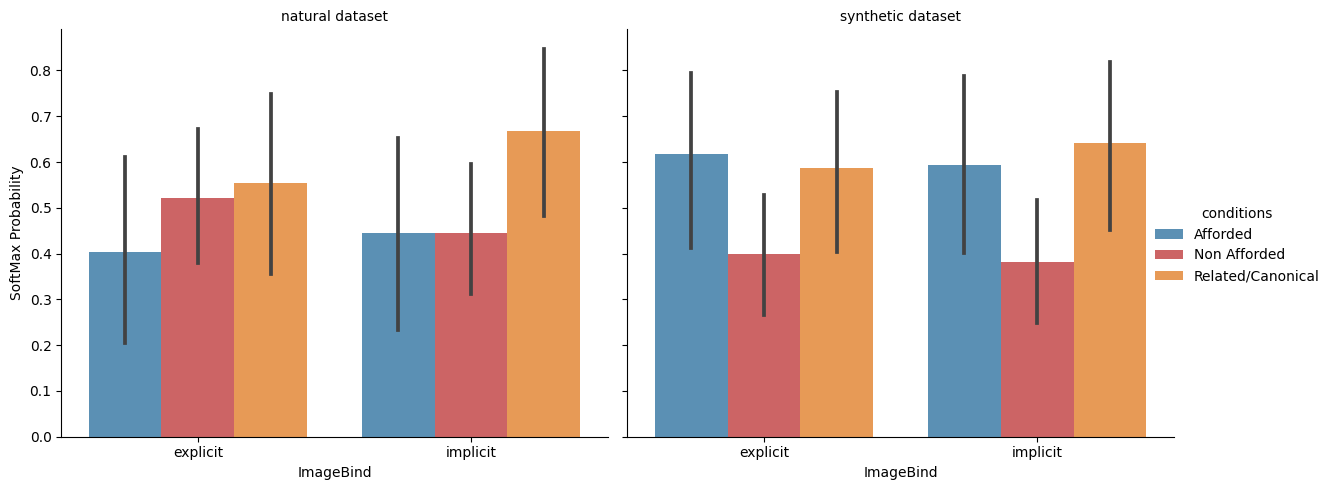

In [21]:
# Plots of Data
plot = sns.catplot(data = smaller_df,
            x = "prompt_type",
            y = "probability",
            hue = "conditions",
            col = "dataset",
            kind='bar',
            height= 5,
            aspect=1.2,
            palette= ['C0','C3','C1'],
            alpha= 0.8)
plot.set_axis_labels('ImageBind','SoftMax Probability')
new_labels = ['Afforded', 'Non Afforded', 'Related/Canonical']  # Adjust these labels as needed
for t, l in zip(plot._legend.texts, new_labels): 
    t.set_text(l)

plot.set_titles("{col_name} dataset")

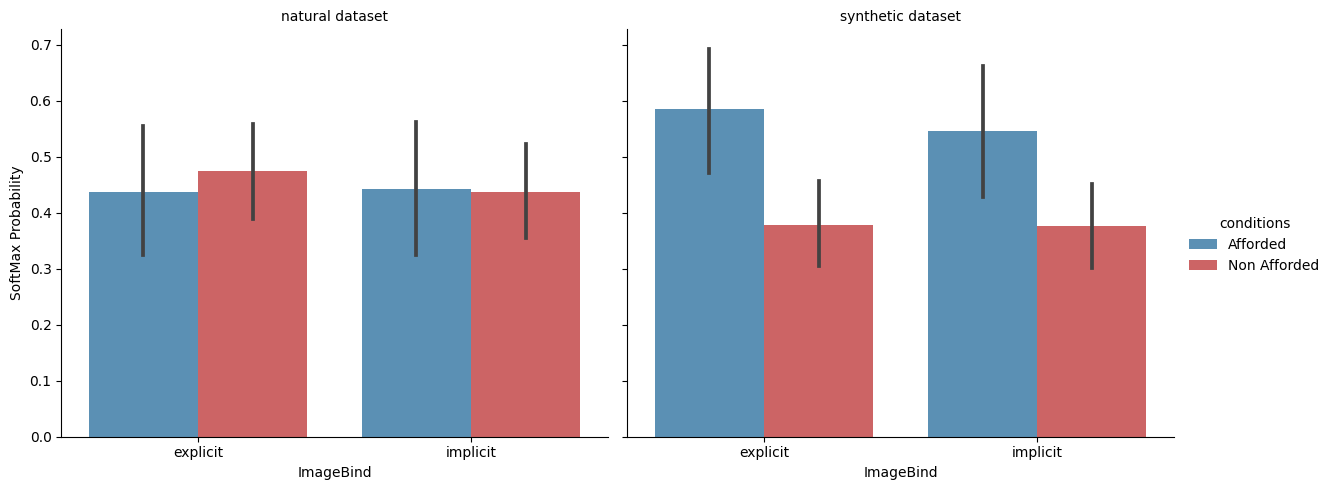

In [22]:
# Plots of Data
smaller_df = df_concat[df_concat['conditions']!='related']
plot = sns.catplot(data = smaller_df,
            x = "prompt_type",
            y = "probability",
            hue = "conditions",
            col = "dataset",
            kind='bar',
            height= 5,
            aspect=1.2,
            palette= ['C0','C3'],
            alpha= 0.8)
plot.set_axis_labels('ImageBind','SoftMax Probability')
new_labels = ['Afforded', 'Non Afforded']  # Adjust these labels as needed
for t, l in zip(plot._legend.texts, new_labels): 
    t.set_text(l)

plot.set_titles("{col_name} dataset")

# By-item Analysis

In [23]:
def pivot_fmp(df, ex_im):
    indexed = df[df['prompt_type']==ex_im]
    pivoted = indexed.pivot_table(index='group_id', columns='relationships', values='probability', aggfunc='mean').reset_index()
    diff = pivoted.assign(diff = abs(pivoted['afforded'] - pivoted['non_afforded']), new_id = np.arange(18))

    return diff

def plot_fmp(df, ex_im, na_sy):
    plot = sns.catplot(data = df,
                       x = "new_id",
                       y = "diff",
                       kind='bar',
                       height= 3,
                       aspect=1.5,
                       palette= ['C0','C3'],
                       alpha= 0.8).set(title = f'Abs difference for {ex_im} {na_sy} data')
    return plot

In [24]:
diff_ex_natural = pivot_fmp(file_natural, 'explicit')
diff_im_natural = pivot_fmp(file_natural, 'implicit')
diff_ex_synthetic = pivot_fmp(file_synthetic, 'explicit')
diff_im_synthetic = pivot_fmp(file_synthetic, 'implicit')

## Absolute Value Differences Analysis

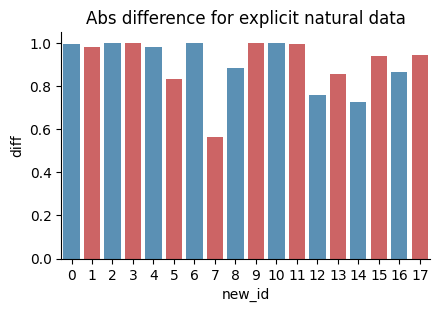

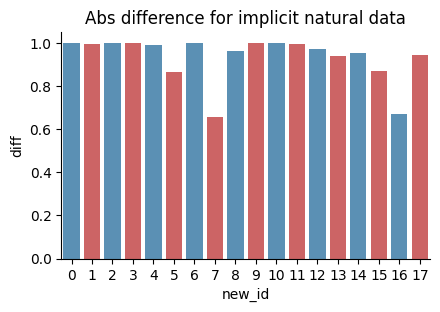

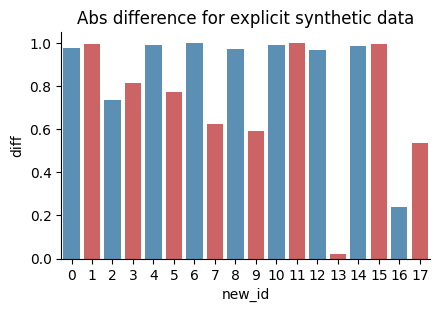

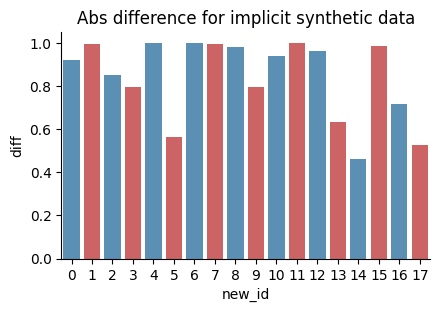

In [25]:
plot_fmp(diff_ex_natural, 'explicit', 'natural')
plot_fmp(diff_im_natural, 'implicit', 'natural')
plot_fmp(diff_ex_synthetic, 'explicit', 'synthetic')
plot_fmp(diff_im_synthetic, 'implicit', 'synthetic')

## Non-Absolute Differences Analysis

In [26]:
# Re-load files
file_natural = pd.read_csv('results/natural/natural_imagebind_afforded.csv')
file_natural = file_natural.drop(columns=['Unnamed: 0'])

file_synthetic = pd.read_csv('results/synthetic/synthetic_imagebind_afforded.csv')
file_synthetic = file_synthetic.drop(columns=['Unnamed: 0'])

In [27]:
# Prelim check of ids
natural_group_ids = set(file_natural['group_id'].unique())
synthetic_group_ids = set(file_synthetic['group_id'].unique())
print(natural_group_ids)
print(synthetic_group_ids)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}


In [28]:
# Pivot for non-absolute
def pivot_fmp_non_abs(df, ex_im):
    indexed = df[df['prompt_type'] == ex_im]
    pivoted = indexed.pivot_table(index='group_id', columns='relationships', 
                                  values='probability', aggfunc='mean').reset_index()
    non_abs_diff = pivoted.assign(diff = pivoted['afforded'] - pivoted['non_afforded'],
                                  new_id = np.arange(len(pivoted)))

    return non_abs_diff

In [29]:
def plot_fmp_non_abs(df, ex_im, na_sy):
    plot = sns.catplot(data = df,
                       x = "new_id",
                       y = "diff",
                       kind='bar',
                       height= 3,
                       aspect=1.5,
                       palette= ['C0'],
                       alpha= 0.8).set(title = f'Difference for {ex_im} {na_sy} data')
    return plot

In [30]:
def correlate_differences(natural_explicit, natural_implicit, synthetic_explicit, synthetic_implicit):
    common_groups_nat = set(natural_explicit['group_id']).intersection(set(natural_implicit['group_id']))
    common_groups_syn = set(synthetic_explicit['group_id']).intersection(set(synthetic_implicit['group_id']))

    # Filter dfs
    nat_exp_common = natural_explicit[natural_explicit['group_id'].isin(common_groups_nat)]
    nat_imp_common = natural_implicit[natural_implicit['group_id'].isin(common_groups_nat)]
    syn_exp_common = synthetic_explicit[synthetic_explicit['group_id'].isin(common_groups_syn)]
    syn_imp_common = synthetic_implicit[synthetic_implicit['group_id'].isin(common_groups_syn)]

    # Calculate corr
    corr_nat_exp_vs_imp = nat_exp_common['diff'].corr(nat_imp_common['diff'])
    corr_syn_exp_vs_imp = syn_exp_common['diff'].corr(syn_imp_common['diff'])

    common_groups_explicit = set(natural_explicit['group_id']).intersection(set(synthetic_explicit['group_id']))
    common_groups_implicit = set(natural_implicit['group_id']).intersection(set(synthetic_implicit['group_id']))

    # Filter dfs (explicit and implicit prompts across datasets)
    nat_explicit_common = natural_explicit[natural_explicit['group_id'].isin(common_groups_explicit)]
    syn_explicit_common = synthetic_explicit[synthetic_explicit['group_id'].isin(common_groups_explicit)]
    nat_implicit_common = natural_implicit[natural_implicit['group_id'].isin(common_groups_implicit)]
    syn_implicit_common = synthetic_implicit[synthetic_implicit['group_id'].isin(common_groups_implicit)]

    # Calculate corr (cross dataset)
    corr_explicit_nat_vs_syn = nat_explicit_common['diff'].corr(syn_explicit_common['diff'])
    corr_implicit_nat_vs_syn = nat_implicit_common['diff'].corr(syn_implicit_common['diff'])

    return corr_nat_exp_vs_imp, corr_syn_exp_vs_imp, corr_explicit_nat_vs_syn, corr_implicit_nat_vs_syn

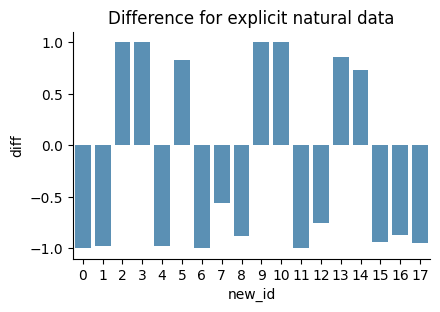

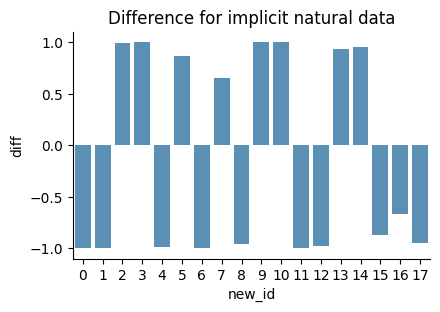

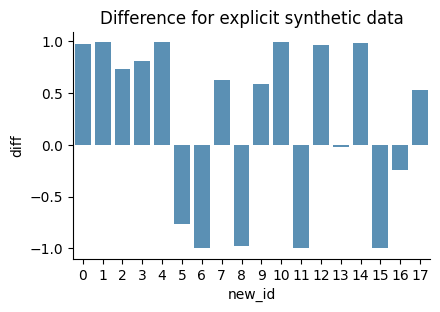

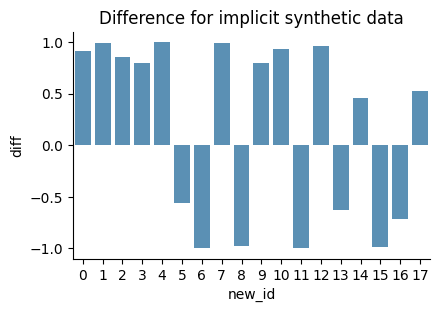

In [31]:
# Calculate non-abs diff
diff_ex_natural_non_abs = pivot_fmp_non_abs(file_natural, 'explicit')
diff_im_natural_non_abs = pivot_fmp_non_abs(file_natural, 'implicit')
diff_ex_synthetic_non_abs = pivot_fmp_non_abs(file_synthetic, 'explicit')
diff_im_synthetic_non_abs = pivot_fmp_non_abs(file_synthetic, 'implicit')

# Plot
plot_fmp_non_abs(diff_ex_natural_non_abs, 'explicit', 'natural')
plot_fmp_non_abs(diff_im_natural_non_abs, 'implicit', 'natural')
plot_fmp_non_abs(diff_ex_synthetic_non_abs, 'explicit', 'synthetic')
plot_fmp_non_abs(diff_im_synthetic_non_abs, 'implicit', 'synthetic')

# Correlation Analysis

In [32]:
def analyze_correlations(natural_explicit, natural_implicit, synthetic_explicit, synthetic_implicit):
    # Compute
    corr_nat_exp_vs_imp, corr_syn_exp_vs_imp, corr_explicit_nat_vs_syn, corr_implicit_nat_vs_syn = correlate_differences(
        natural_explicit, natural_implicit, synthetic_explicit, synthetic_implicit
    )

    # Print
    print(f"Correlation between explicit and implicit prompts within natural dataset: {corr_nat_exp_vs_imp}")
    print(f"Correlation between explicit and implicit prompts within synthetic dataset: {corr_syn_exp_vs_imp}")
    print(f"Correlation of explicit prompts between natural and synthetic datasets: {corr_explicit_nat_vs_syn}")
    print(f"Correlation of implicit prompts between natural and synthetic datasets: {corr_implicit_nat_vs_syn}")

analyze_correlations(diff_ex_natural_non_abs, diff_im_natural_non_abs, 
                     diff_ex_synthetic_non_abs, diff_im_synthetic_non_abs)

Correlation between explicit and implicit prompts within natural dataset: 0.9505623670647826
Correlation between explicit and implicit prompts within synthetic dataset: 0.9564549504540861
Correlation of explicit prompts between natural and synthetic datasets: 0.2702873906952157
Correlation of implicit prompts between natural and synthetic datasets: 0.2634577764819398


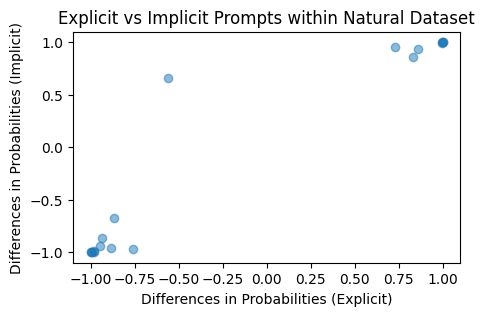

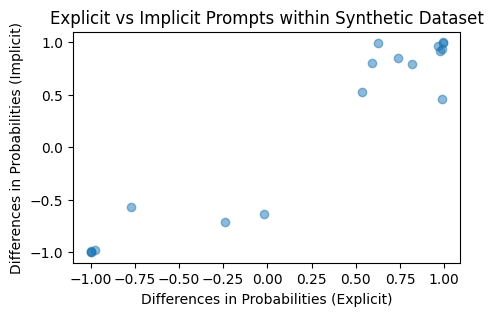

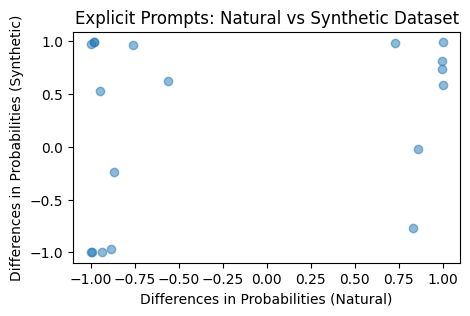

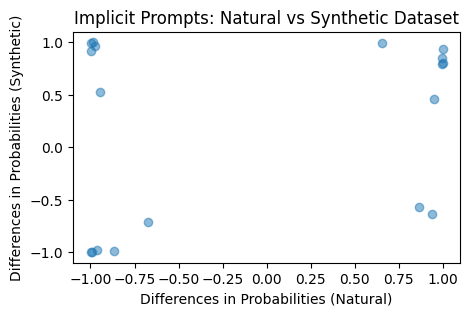

In [33]:
# Explicit vs Implicit within Natural
plt.figure(figsize=(5, 3))
plt.scatter(diff_ex_natural_non_abs['diff'], diff_im_natural_non_abs['diff'], alpha=0.5)
plt.title('Explicit vs Implicit Prompts within Natural Dataset')
plt.xlabel('Differences in Probabilities (Explicit)')
plt.ylabel('Differences in Probabilities (Implicit)')
plt.show()

# Explicit vs Implicit within Synthetic
plt.figure(figsize=(5, 3))
plt.scatter(diff_ex_synthetic_non_abs['diff'], diff_im_synthetic_non_abs['diff'], alpha=0.5)
plt.title('Explicit vs Implicit Prompts within Synthetic Dataset')
plt.xlabel('Differences in Probabilities (Explicit)')
plt.ylabel('Differences in Probabilities (Implicit)')
plt.show()

# Explicit Prompts between Natural and Synthetic
plt.figure(figsize=(5, 3))
plt.scatter(diff_ex_natural_non_abs['diff'], diff_ex_synthetic_non_abs['diff'], alpha=0.5)
plt.title('Explicit Prompts: Natural vs Synthetic Dataset')
plt.xlabel('Differences in Probabilities (Natural)')
plt.ylabel('Differences in Probabilities (Synthetic)')
plt.show()

# Implicit Prompts between Natural and Synthetic
plt.figure(figsize=(5, 3))
plt.scatter(diff_im_natural_non_abs['diff'], diff_im_synthetic_non_abs['diff'], alpha=0.5)
plt.title('Implicit Prompts: Natural vs Synthetic Dataset')
plt.xlabel('Differences in Probabilities (Natural)')
plt.ylabel('Differences in Probabilities (Synthetic)')
plt.show()